#Lab 6 Algorithms UN 2020-II by Jhon Sebastian Rojas Rodriguez
## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Funciones a analizar
def f1(z):
    return z ** 2
sf1 = "f(x) = x^2"

def df1(z):
    return 2 * z

def f2(z):
  return (z-1) ** 2
sf2 = "f(x) = (x-1)^2"

def df2(z):
  return 2*z - 2

def f3(z):
  return z ** 2 - 1
sf3 = "f(x) = x^2 - 1"

def f4(z):
  return z ** 2 + 1
sf4 = "f(x) = x^2 + 1"

In [ ]:
def newton_set(f, df, r1, r2, z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """
    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed
    
    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:
                    #blue   
                   pixels[height-y-1,x] = (0,191,255)
    return pixels

In [ ]:
def display(f, df, r1, r2, s, z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set(f, df, r1, r2, z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal'+s)
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

In [ ]:
def graficarFuncion(f,s):
  x = np.linspace(-5.0,5.0,100)
  fig, ax = plt.subplots()
  ax.plot(x,f(x))
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title(s)
  plt.xlabel('x')
  plt.ylabel('f(x)')

Function that iterates for some z

In [ ]:
def iterar(f, df, z):
  r=[]
  i=[]
  for k in range(50):
    dz = df(z)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form z='+str(z))
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imagnary part')
  plt.show()

1. Plot the functions in a x range that include that include the vertex and the roots (if there are roots)

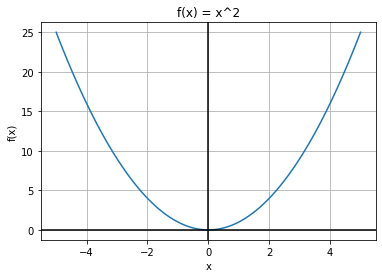

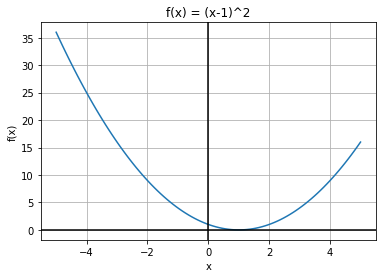

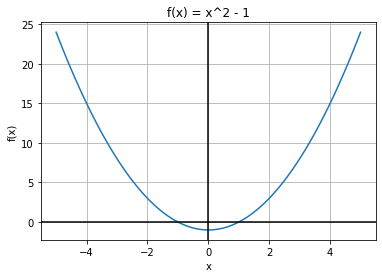

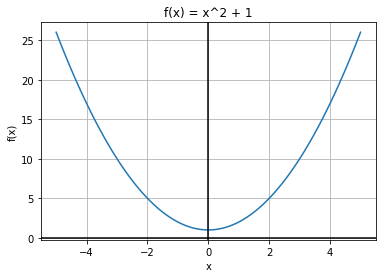

In [ ]:
functions = [(f1, df1,sf1,0,0), (f2, df2,sf2,1,1), (f3, df1,sf3,1,-1), (f4,df1,sf4,complex(0,1),complex(0,-1))]
for f,_ ,s,_,_ in functions:
  graficarFuncion(f,s)

2. Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations:

####Classic ($x=\frac{-B\pm \sqrt{B^2-4AC}}{2A}$):  
$x^2=0$  
$x=\frac{-0\pm \sqrt{0^2-4A*0}}{2*1}$  
$x_1 = x_2 = 0$  
___  
$(x-1)^2=x^2-2x+1=0$  
$x=\frac{2\pm \sqrt{-2^2-4*1*1}}{2*1}$  
$x_1 = x_2=1$  
___
$x^2-1=0$  
$x=\frac{-0\pm \sqrt{0^2-4*1*-1}}{2*1}$  
$x_1=-1, x_2=1$  
___
$x^2+1=0$  
$x=\frac{0\pm\sqrt{0-4*1*1}}{2*1}=\pm i$  
$x_1=i,x_2=-i$   
####Po Shen Loh ($x=\frac{-B}{2}\pm \sqrt{\frac{B^2}{4}-C}$):
$x^2=0$  
$x=\frac{-0}{2}\pm \sqrt{\frac{0^2}{4}-0}$  
$x_1 = x_2 = 0$   
___
$(x-1)^2=x^2-2x+1=0$  
$x=\frac{2}{2}\pm \sqrt{\frac{{-2}^2}{4}-1}$   
$x_1 = x_2=1$   
___
$x^2-1=0$  
$x=\frac{-0}{2}\pm \sqrt{\frac{0^2}{4}+1}$  
$x_1=-1, x_2=1$
___
$x^2+1=0$  
$x=\frac{0}{2}\pm \sqrt{\frac{0^2}{4}-1}$  
$x_1=i,x_2=-i$  

3. Plot the newton fractals for the corresponding complex quadratic polynomials

Newton Fractals for f(x) = x^2 :

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


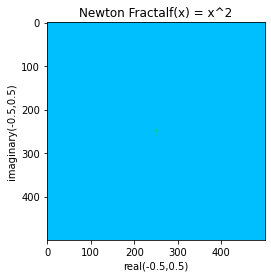

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


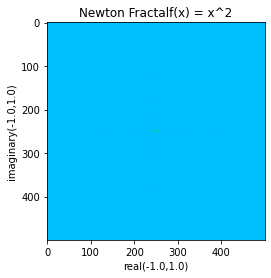

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


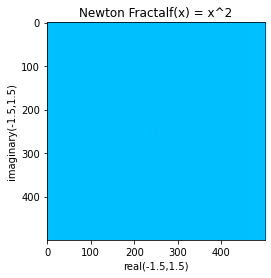

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


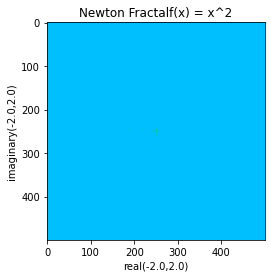

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


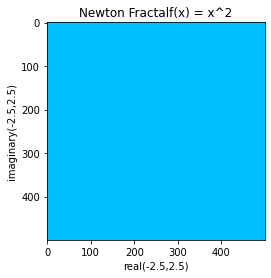

Newton Fractals for f(x) = (x-1)^2 :

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


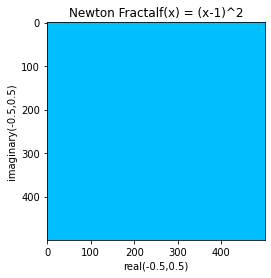

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


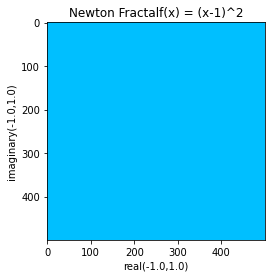

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


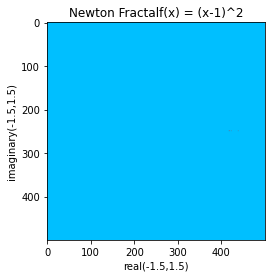

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


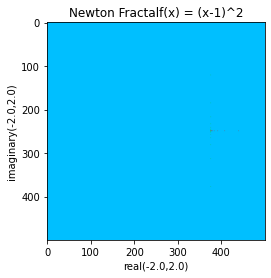

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


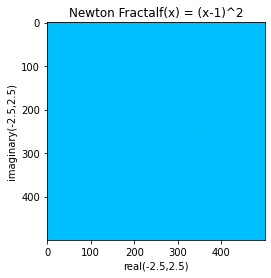

Newton Fractals for f(x) = x^2 - 1 :

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


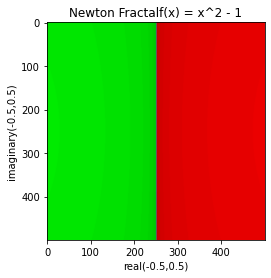

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


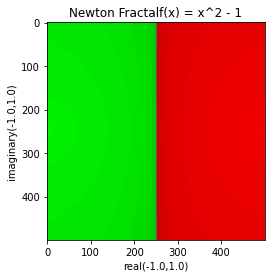

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


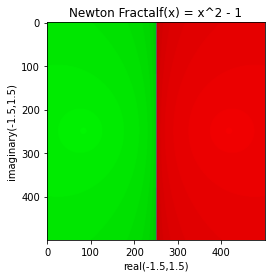

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


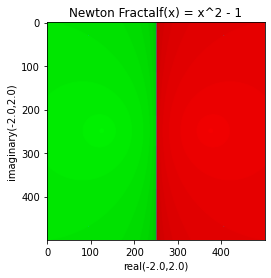

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


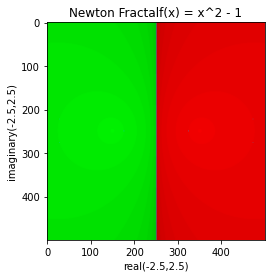

Newton Fractals for f(x) = x^2 + 1 :

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


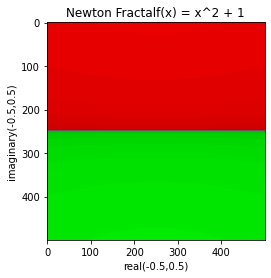

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


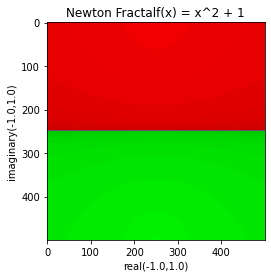

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


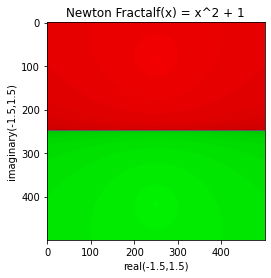

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


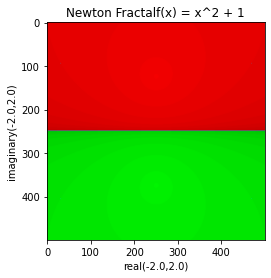

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


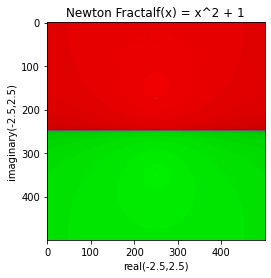

In [ ]:
for f,df,s,r1,r2 in functions:
  print("Newton Fractals for",s,":\n")
  display(f=f,df=df,r1=r1,r2=r2,s=s,zoom=1)
  display(f=f,df=df,r1=r1,r2=r2,s=s,zoom=2)
  display(f=f,df=df,r1=r1,r2=r2,s=s,zoom=3)
  display(f=f,df=df,r1=r1,r2=r2,s=s,zoom=4)
  display(f=f,df=df,r1=r1,r2=r2,s=s,zoom=5)

4. y 5. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.
Plot he Newton iterates for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.

Iterations on function f(x) = x^2:



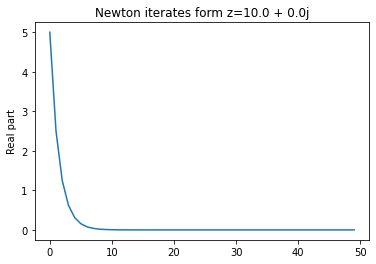

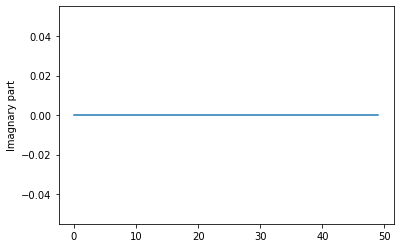

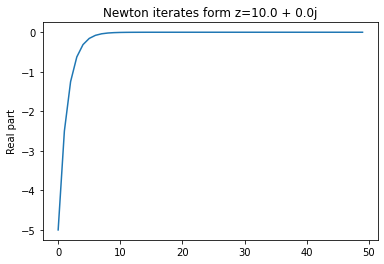

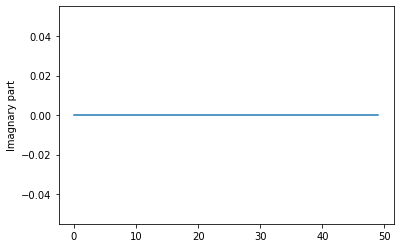

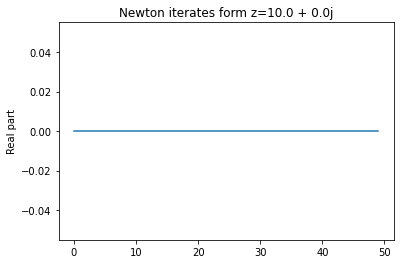

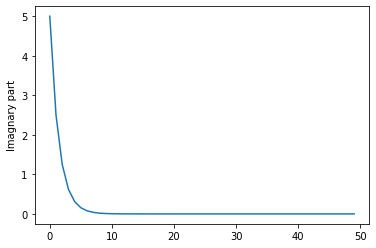

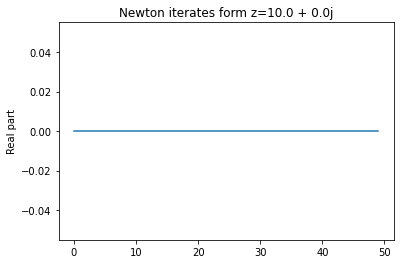

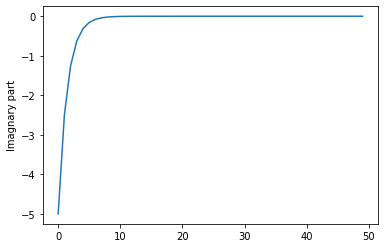

Iterations on function f(x) = (x-1)^2:



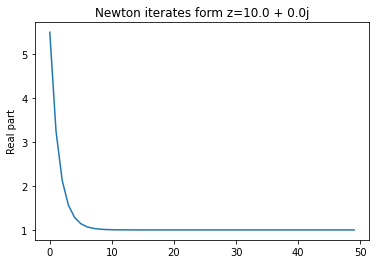

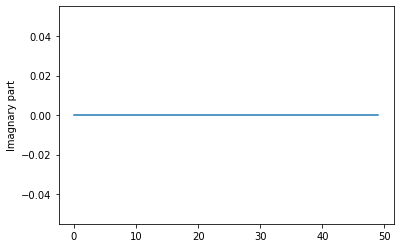

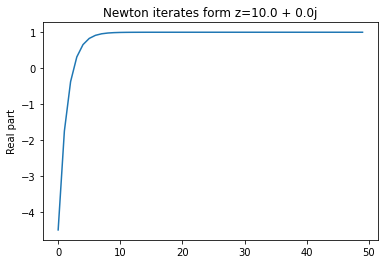

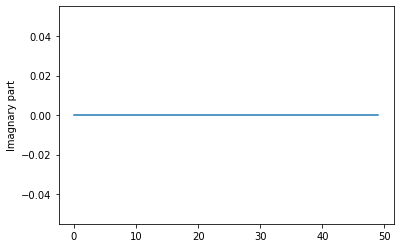

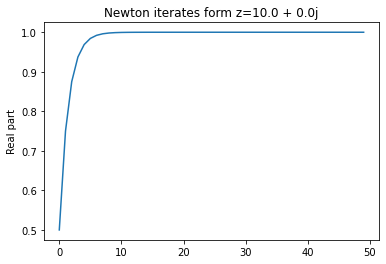

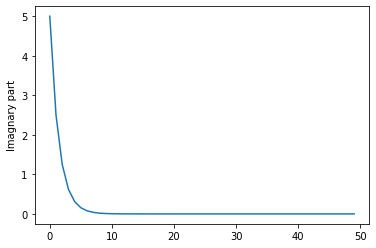

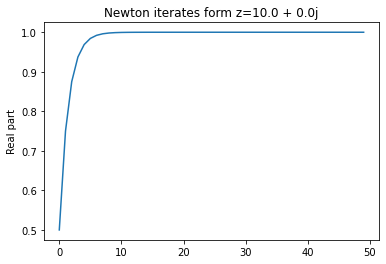

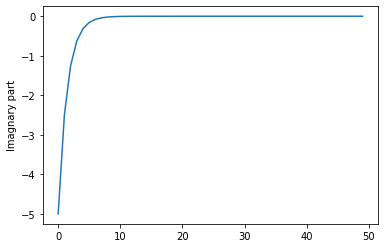

Iterations on function f(x) = x^2 - 1:



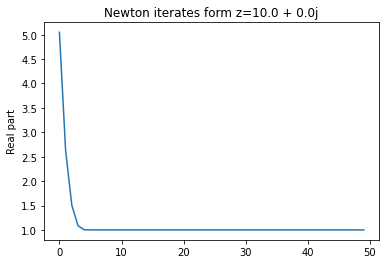

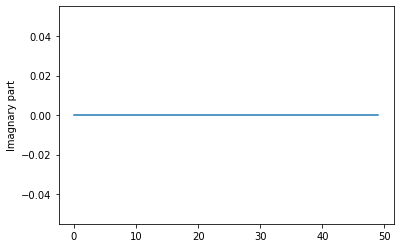

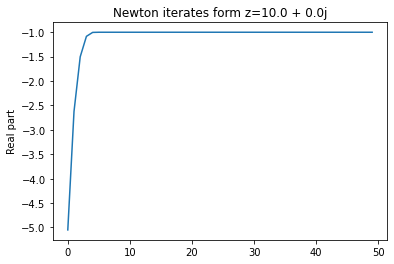

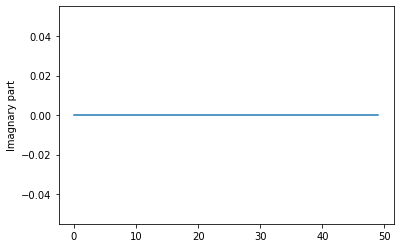

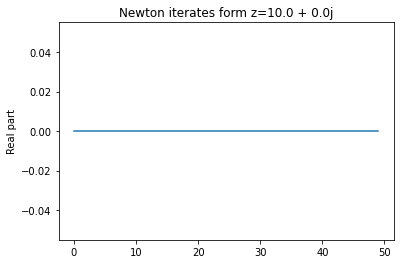

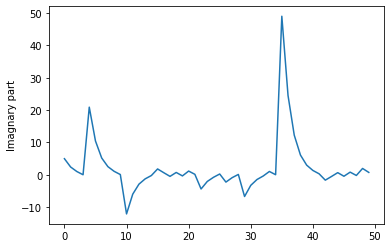

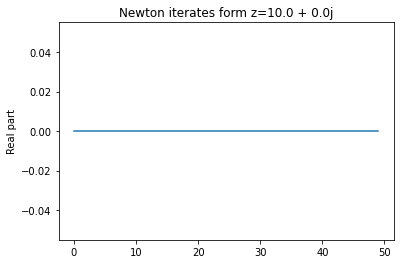

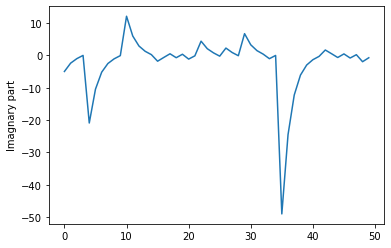

Iterations on function f(x) = x^2 + 1:



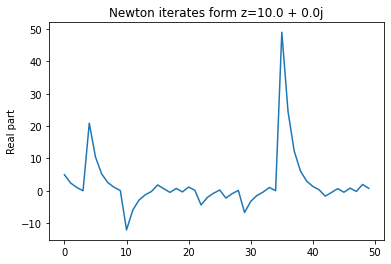

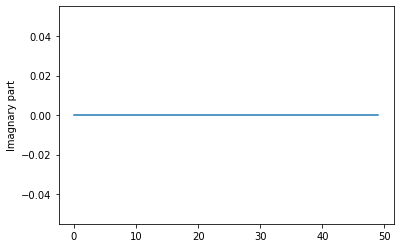

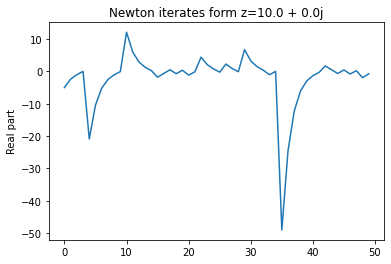

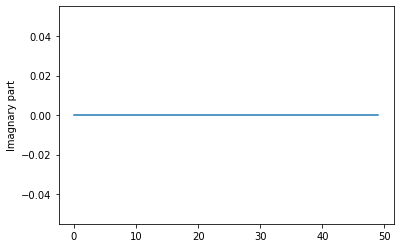

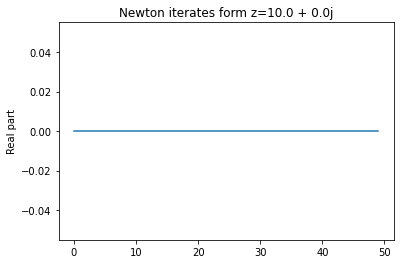

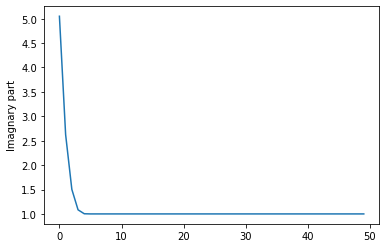

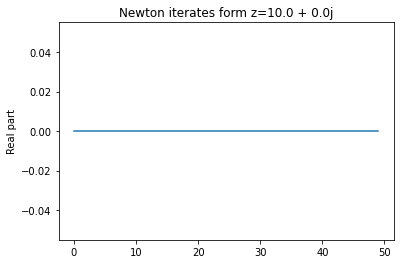

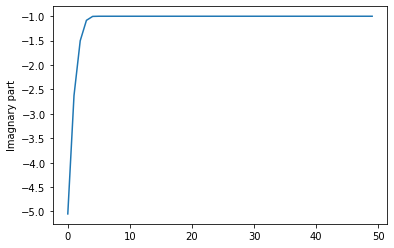

In [ ]:
Z = [10.0 + 0.0j, -10.0 + 0.0j,-0.0 + 10.0j, -0.0 - 10.0j]
for f, df, s, r1 , r2 in functions:
  print("Iterations on function "+s+":\n")
  for z in Z:
    iterar(f,df,z)